In [2]:
# Import Libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np 
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as msnum 
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression

/Users/jacobbarcelona/.pyenv/versions/3.8.12/lib/python3.8/site-packages/pandas/compat/_optional.py:149: UserWarning: Pandas requires version '1.3.1' or newer of 'bottleneck' (version '1.2.1' currently installed).
  warnings.warn(msg, UserWarning)


## Import Data

In [8]:
reddit_train=pd.read_csv('train_NIR5Yl1.csv')
reddit_test=pd.read_csv('test_8i3B3FC.csv')
# reddit=reddit1.append(reddit2, ignore_index=True)

Data Dictionary

Variables
- ID : Contains the id of the post
- Tag : Type of question
- Reputation : what is the user's reputation who have posted the post
- Answers : Answer provided by other users
- Username : Id of the user
- Views : Number of views the question has received
- Upvotes (Target) : Number of upvotes for the post

In [9]:
reddit_train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [10]:
reddit_test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


### Missing Values

<AxesSubplot:>

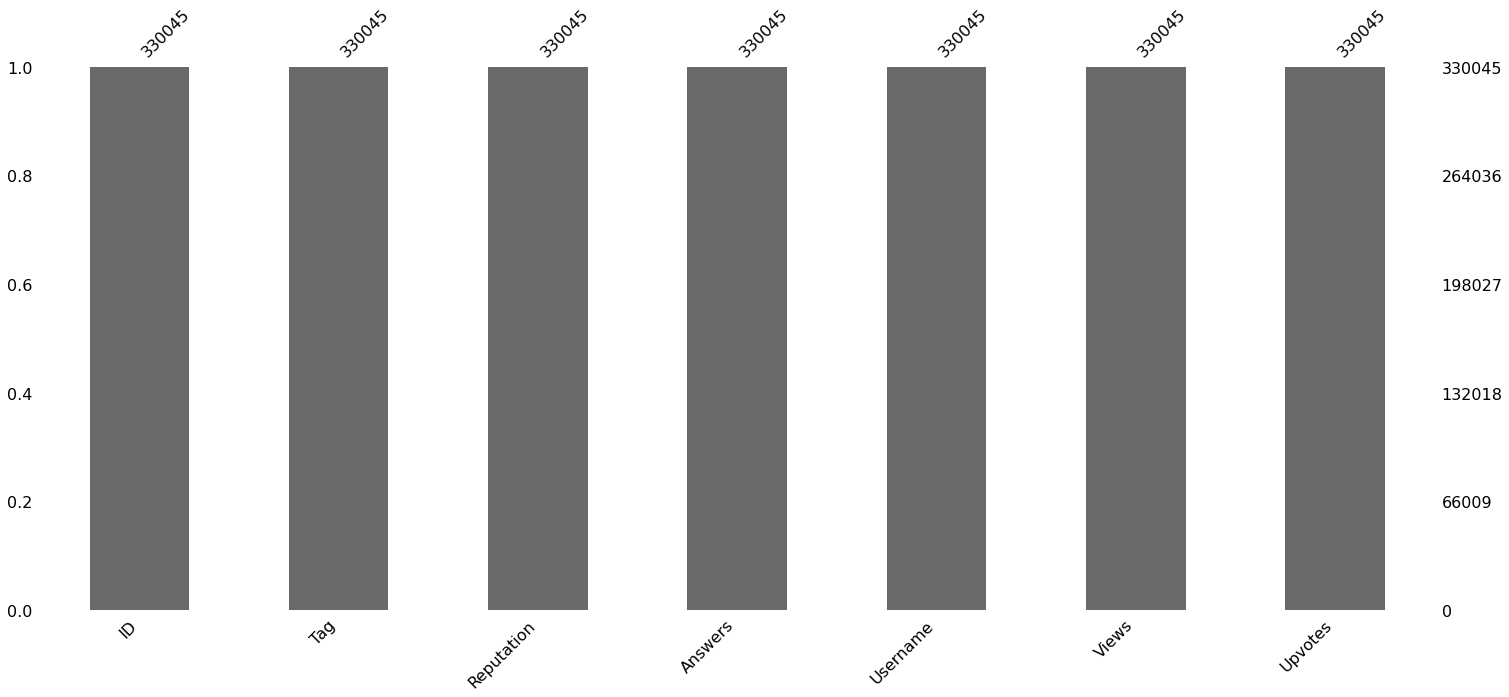

In [11]:
#bar plot
msnum.bar(reddit_train)

<AxesSubplot:>

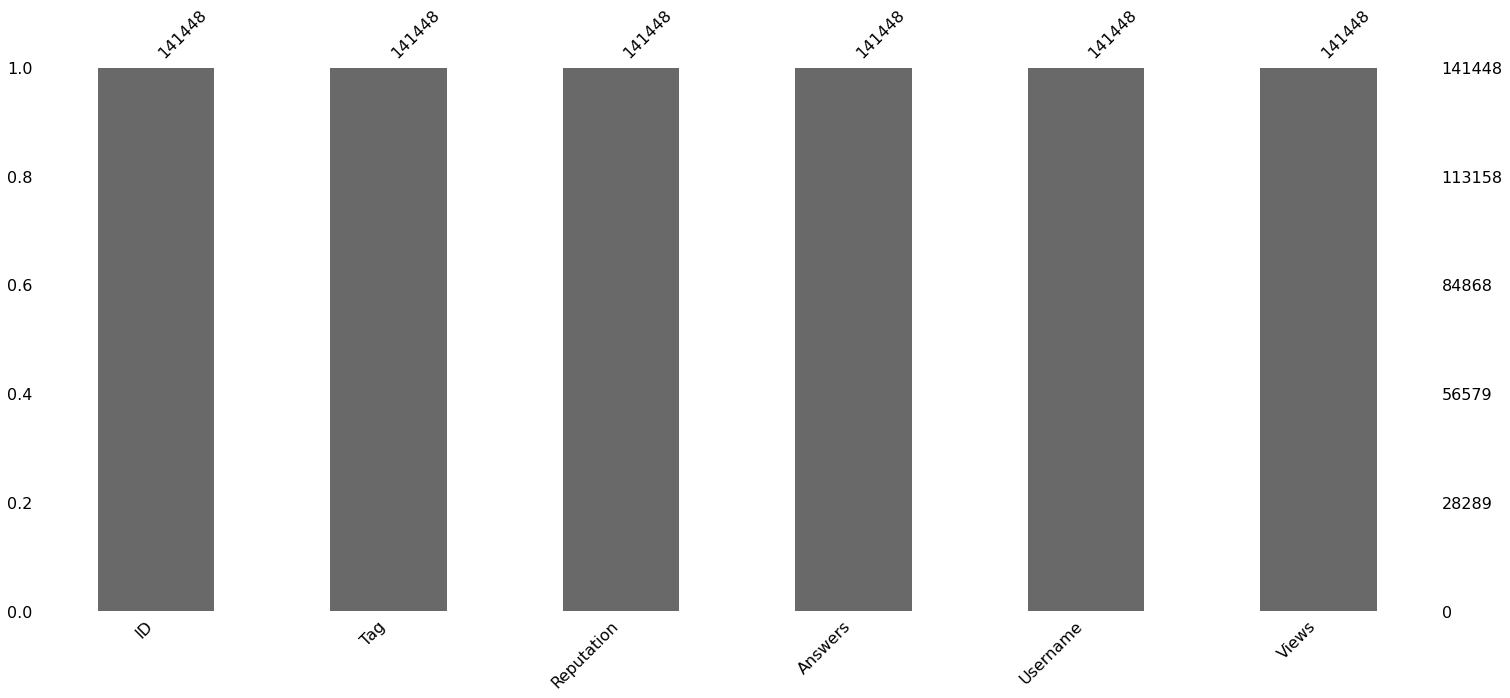

In [12]:
msnum.bar(reddit_test)

Both train and test sets have no missing values, so no dropping or editing the dataset is needed.

### Exploratory Data Analysis

In [13]:
reddit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          330045 non-null  int64  
 1   Tag         330045 non-null  object 
 2   Reputation  330045 non-null  float64
 3   Answers     330045 non-null  float64
 4   Username    330045 non-null  int64  
 5   Views       330045 non-null  float64
 6   Upvotes     330045 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


As we can see above our cateogorical variables are [Tag], and our numerical variables are [ID,Reputation,Answers,Username,Views, and Upvotes]

Since Username and ID are both indentifiers, we will not be using them for our prediction

In [14]:
reddit_train=reddit_train.drop(['ID','Username'],axis=1)
reddit_test=reddit_test.drop(['ID','Username'],axis=1)

In [15]:
to_plot=reddit_train[:1500]

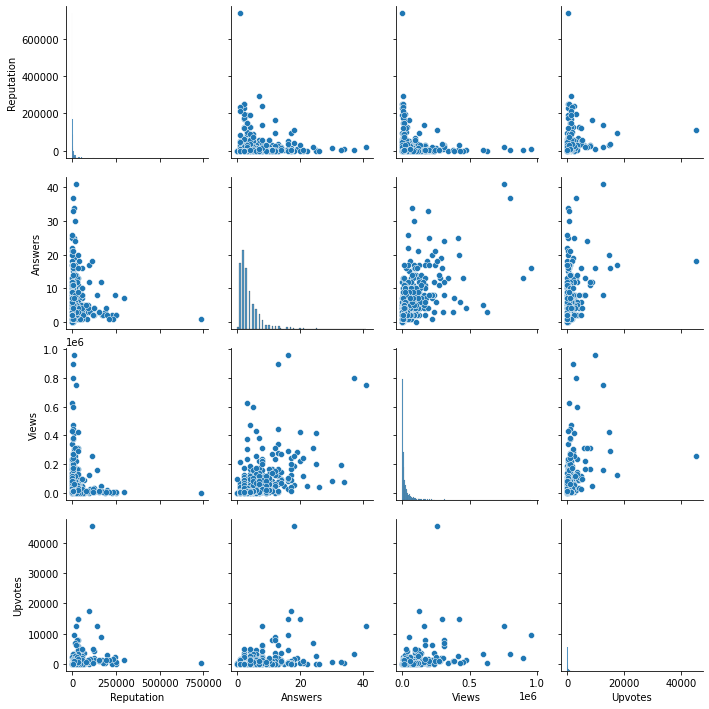

In [16]:
sns.pairplot(to_plot)

<AxesSubplot:>

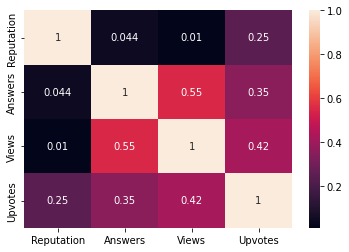

In [17]:
sns.heatmap(to_plot.corr(),annot=True)

Upvotes seem relatively highly correlated with Views and Reputation. Both these correlations seem linear, so it seems like we an do a Linear Regression.

First, though, let's dive deeper into Tag as our prediction might depend on what Tag a post has.

<AxesSubplot:ylabel='Tag'>

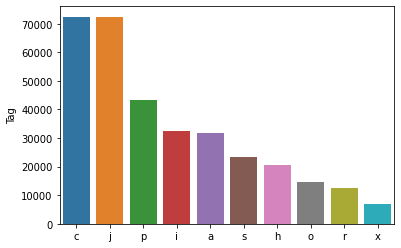

In [18]:

sns.barplot(x=reddit_train.Tag.value_counts().index, y=reddit_train.Tag.value_counts())

As we can see there is a large disparity between the amount of posts in each category, so let's see the correlation of our variables with our target per category

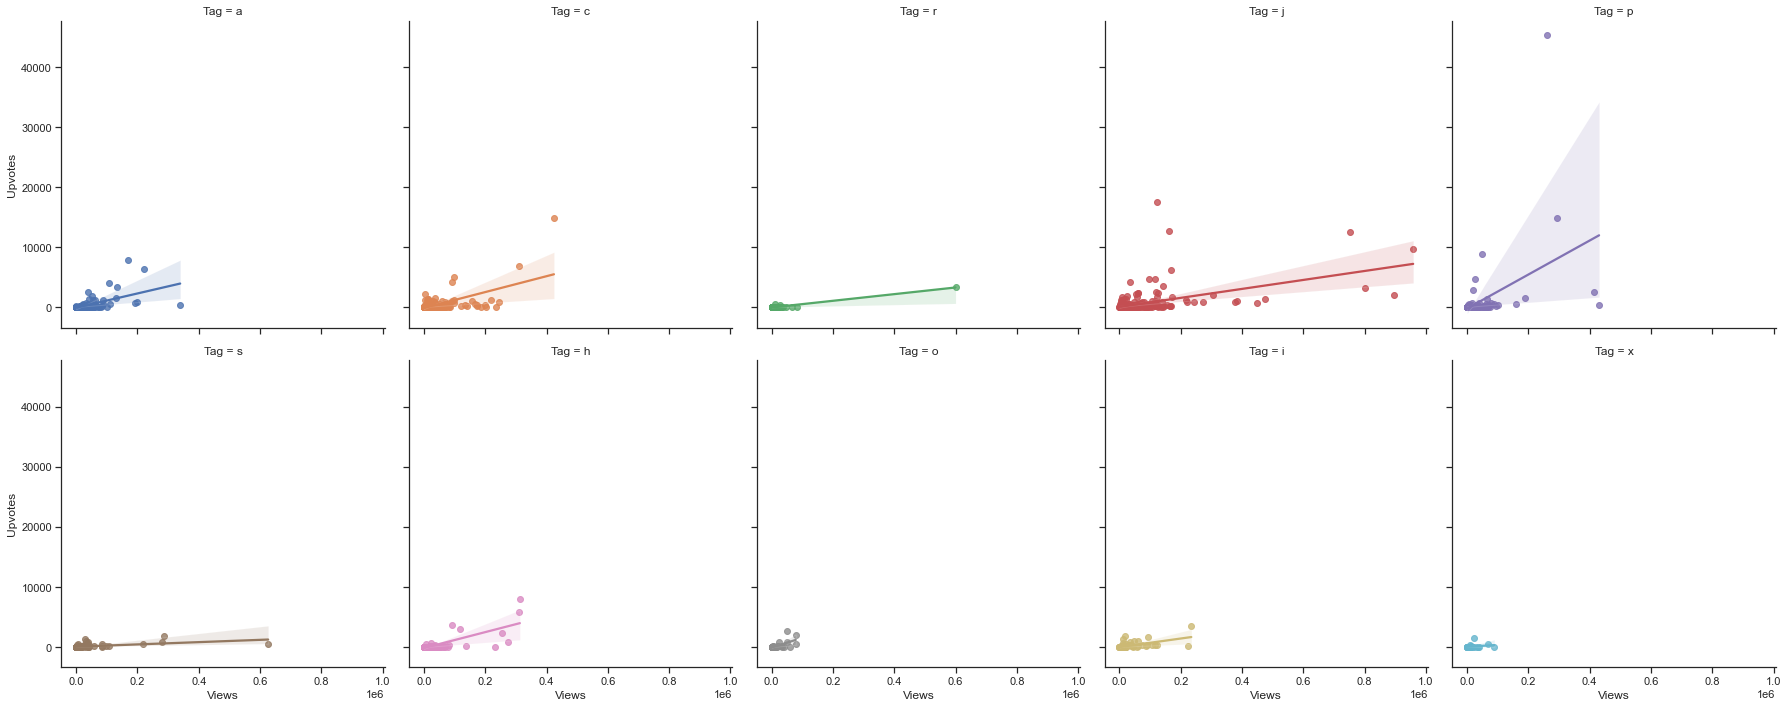

In [19]:
sns.set(font_scale=1.0,style="ticks")
ax = sns.lmplot(x="Views", y="Upvotes",col="Tag",col_wrap=5,hue="Tag",height=5, data=to_plot)

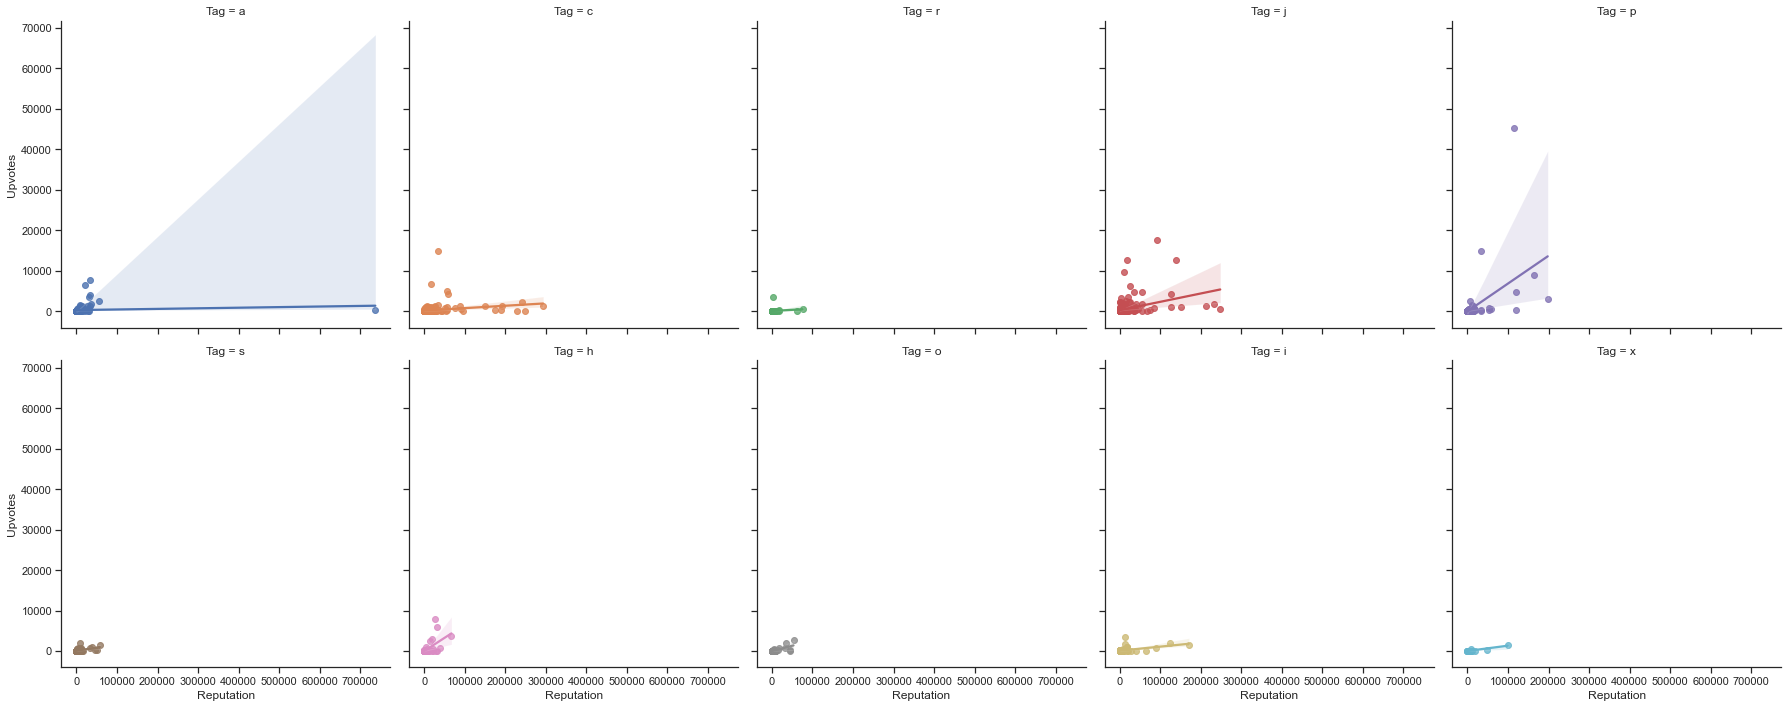

In [20]:
sns.set(font_scale=1.0,style="ticks")
ax = sns.lmplot(x="Reputation", y="Upvotes",col="Tag",col_wrap=5,hue="Tag",height=5, data=to_plot)

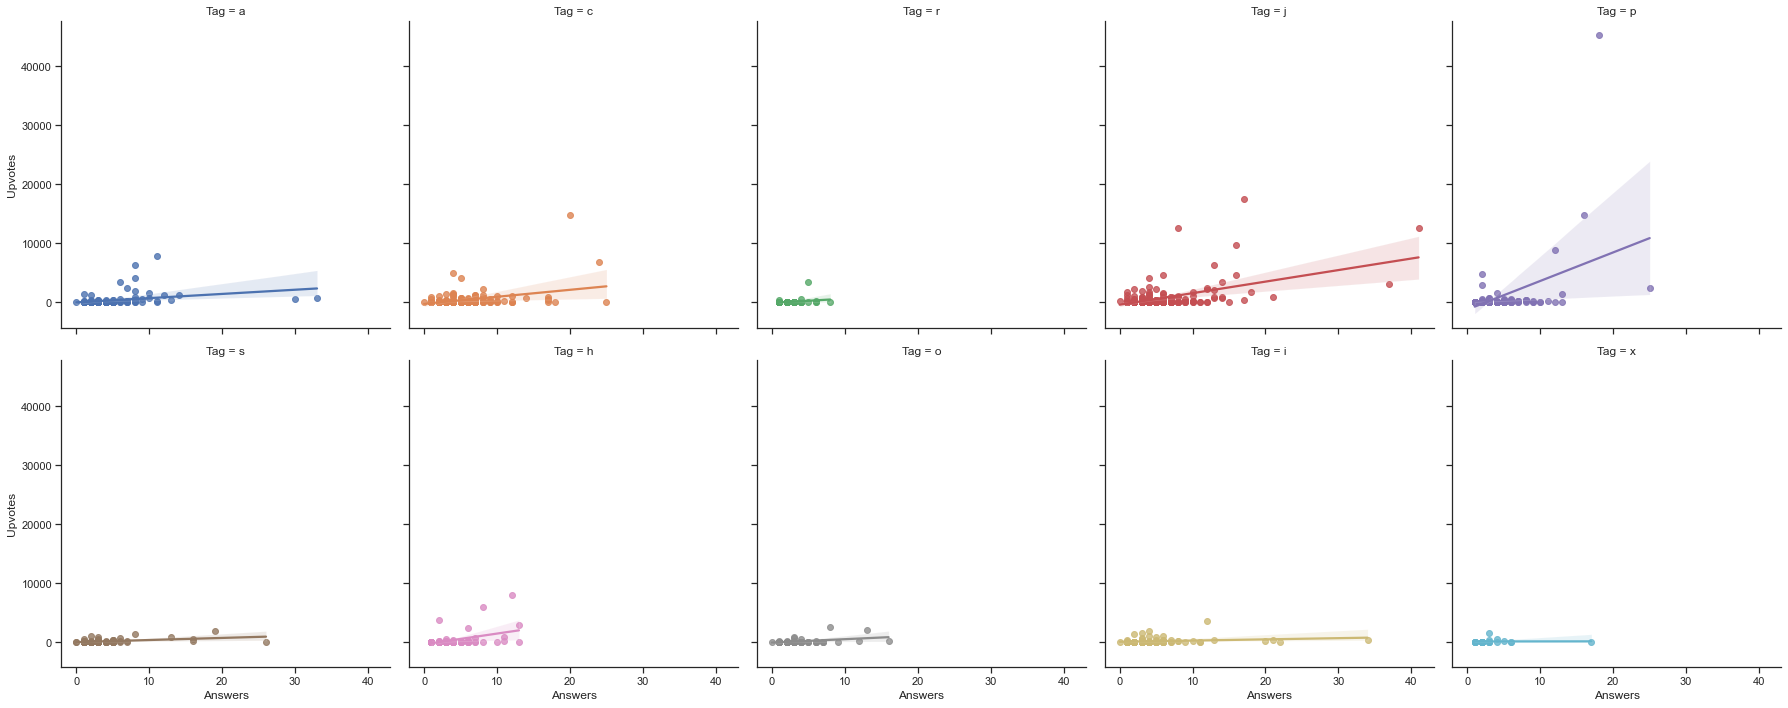

In [21]:
sns.set(font_scale=1.0,style="ticks")
ax = sns.lmplot(x="Answers", y="Upvotes",col="Tag",col_wrap=5,hue="Tag",height=5, data=to_plot)

## Encoding

Since tag seems to have a marginal effect on our numerical variables let's encode it so we can use it in our model

In [22]:
encoder=OrdinalEncoder()
reddit_train['Tag']=encoder.fit_transform(reddit_train.loc[:, ['Tag']])


In [23]:
reddit_train

,Tag,Reputation,Answers,Views,Upvotes
0,0.0,3942.0,2.0,7855.0,42.0
1,0.0,26046.0,12.0,55801.0,1175.0
2,1.0,1358.0,4.0,8067.0,60.0
3,0.0,264.0,3.0,27064.0,9.0
4,1.0,4271.0,4.0,13986.0,83.0
...,...,...,...,...,...
330040,1.0,36.0,2.0,1063.0,0.0
330041,1.0,1649.0,2.0,23319.0,73.0
330042,1.0,6178.0,2.0,2453.0,15.0
330043,4.0,89.0,2.0,2107.0,3.0


In [24]:
# reddit_train=reddit_train[:200000]

In [25]:
train_y=reddit_train['Upvotes']
reddit_train=reddit_train.drop(['Upvotes'],axis=1)

## Scaling and Normalizing

In [26]:
scaled_reddit_train=reddit_train.copy()

In [27]:
col_names = ['Reputation', 'Answers','Views']
features = scaled_reddit_train[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.fit_transform(features.values)

In [28]:
scaled_reddit_train[col_names] = features

In [29]:
scaled_reddit_train=scaled_reddit_train
scaled_reddit_train

,Tag,Reputation,Answers,Views
0,0.0,-0.141573,-0.535736,-0.269158
1,0.0,0.675238,2.257943,0.323087
2,1.0,-0.237059,0.023000,-0.266540
3,0.0,-0.277486,-0.256368,-0.031882
4,1.0,-0.129415,0.023000,-0.193426
...,...,...,...,...
330040,1.0,-0.285911,-0.535736,-0.353055
330041,1.0,-0.226306,-0.535736,-0.078142
330042,1.0,-0.058946,-0.535736,-0.335886
330043,4.0,-0.283953,-0.535736,-0.340160


## Train-Test Split

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
X_train, X_test, y_train, y_test = train_test_split(scaled_reddit_train.values, train_y.values, test_size = 0.2, random_state = 7)

## Linear Model

In [31]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))

0.28262438379706445


## Decision Tree Regressor

In [35]:
#Decision Tree Regressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
print(regressor.score(X_test, y_test))
# cross_val_score(regressor, X_test, y_test, cv=10)

0.8015616297550908


In [41]:
#Regressor predict
predictions=regressor.predict(X_test)
#Regressor actual
actual=y_test
#Get MSE

## Model Evaluation

In [59]:
#Mean squared error and  confusion matrix
from sklearn.metrics import mean_squared_error,confusion_matrix,r2_score
predictions=regressor.predict(X_test)
mse=mean_squared_error(y_test, predictions)
r2=r2_score(y_test, predictions)

In [56]:
mse

1609324.5744784803

In [60]:
r2

0.8015616297550908

Above we can see we have an extrememly high error, which means there must be a lot of variability in the dataset. Our r2 is high though which is a good indication that our model is well fit.

## Pipeline

In [62]:
from sklearn.pipeline import make_pipeline
pipeline=make_pipeline(scaler,encoder,regressor)
# Pipeline(steps=[('standardscaler', scaler),('encoder',encoder)
#                 ('dtregressior', regressor)])

In [63]:
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ordinalencoder', OrdinalEncoder()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=0))])